In [310]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as math
import datetime 

GET A DATA OVERVIEW


General Data


In [3]:
class Datasets:

    def get_dataset(path, delimiter=' ', header=None, encoding=None, columns=[]):
        dataset = pd.read_csv(path, delimiter=delimiter, header=header, encoding=encoding)
        dataset.columns = columns
        return dataset

plt.style.use('fast')

data = Datasets

Define datasets

In [171]:
path_info = "ml-100k/u.info"
path_data = "ml-100k/u.data"
path_user = "ml-100k/u.user"
path_items ="ml-100k/u.item"

data.infoColumns = ['size', 'items']
data.dataColumns = ['users_id', 'item_id', 'ratings', 'timestamp']
data.userColumns = ['user_id', 'age', 'genre', 'occupation', 'zip_code']
data.dsCategorieColumns = ['unknown','Action','Adventure','Animation','Children','Comedy','Crime',
                            'Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery',
                            'Romance','Sci-Fi','Thriller','War','Western']
data.dsItemColumns = ['movie_id','movie_title','release_date',
                            'video_release_date','IMDb_URL','unknown','Action','Adventure','Animation','Children','Comedy','Crime',
                            'Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery',
                            'Romance','Sci-Fi','Thriller','War','Western']

dataset_info = data.get_dataset(path=path_info, columns=data.infoColumns)
dataset_data = data.get_dataset(path=path_data, delimiter="\t", columns=data.dataColumns)
dataset_users = data.get_dataset(path=path_user, delimiter="|", columns=data.userColumns)
dataset_items = data.get_dataset(path=path_items, delimiter="|", encoding='latin', columns=data.dsItemColumns)

data.info = dataset_info
data.data = dataset_data
data.users = dataset_users
data.items = dataset_items

The number of users

In [5]:
num_users = dataset_info.iloc[0].to_list()
print("Quantidade de usuarios: ", num_users[0])

Quantidade de usuarios:  943


The number of items


In [6]:
num_items = dataset_info.iloc[1].to_list()
print("Quantidade de items: ", num_items[0])

Quantidade de items:  1682


The sparcity of datasets

In [7]:
num_ratings = dataset_data.shape[0]

total_possible_ratings = num_users[0] * num_items[0]
sparsity = (1 - (num_ratings/total_possible_ratings)) * 100 
print("Sparsity of dataset: ", round(sparsity, 2))


Sparsity of dataset:  93.7


DEMOGRAPHIC INFORMATION


Distribuition by age

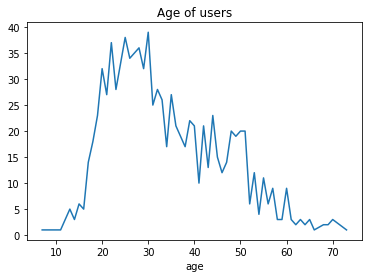

In [8]:
age_distribuition = dataset_users[['user_id', 'age']]
age_distribuition = age_distribuition.groupby('age').size() 
age_distribuition.plot.line()
plt.title('Age of users')
plt.show()

Distribuition by gender

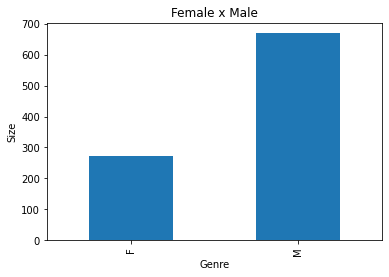

In [9]:
gender_distribuition = dataset_users[['user_id', 'genre']]
gender_distribuition = gender_distribuition.groupby('genre').size()

plt.title('Female x Male')
gender_distribuition.plot(xlabel="Genre", ylabel="Size",  kind="bar")
plt.show()

Distribuition by occupation

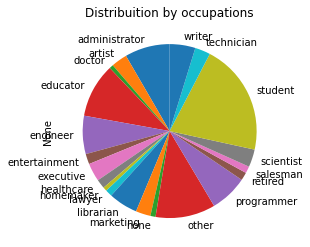

In [10]:
occupation_distribuition = dataset_users[['user_id', 'occupation']]
occupation_distribuition = occupation_distribuition.groupby('occupation').size()
occupation_flag = list(dict(occupation_distribuition).keys())


occupation_distribuition.plot.pie(labels=occupation_flag, startangle=90)

plt.title('Distribuition by occupations')
plt.show()

Distribuitions of items

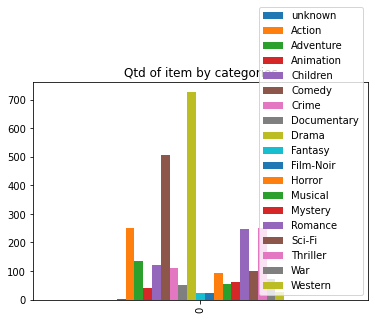

In [12]:
items_categories = dataset_items.drop(labels=columns_items[0:5], axis=1)

size_list = list()
def count_categories(col, size_list):
    size_list.append(col.sum())

for col in items_categories:
    count_categories(items_categories[col], size_list)

categories_table = pd.DataFrame(columns=columns_items[5:])
categories_table.loc[0] = size_list
categories_table.plot.bar()
plt.title('Qtd of item by categories')
plt.legend(loc = "lower right")
plt.show()
    

Rating Frequency

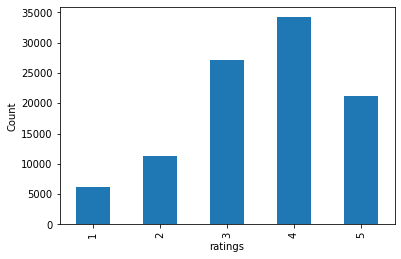

In [13]:
rate_frequency = dataset_data[['item_id', 'ratings']].groupby('ratings').size()
rate_frequency.plot.bar(xlabel=None, ylabel='Count')
plt.show()

Item's popularity

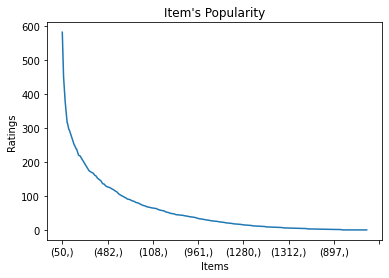

In [14]:
items_popularity = dataset_data[['item_id']].value_counts()
items_popularity.plot(xlabel="Items", ylabel="Ratings")
plt.title("Item's Popularity")
plt.show()

User Historic Interation

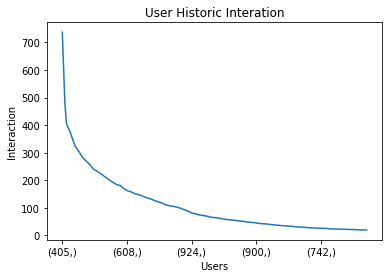

In [15]:
user_interaction = dataset_data[['users_id']].value_counts()
user_interaction.plot(xlabel="Users", ylabel="Interaction")
plt.title('User Historic Interation')
plt.show()

Items Rates by interval

In [16]:
interval_base = data.data[['item_id', 'timestamp']].copy()

date = datetime.datetime

def timestamp_to_day(timestamp):
    return date.fromtimestamp(timestamp).strftime("%d")

def timestamp_to_month(timestamp):
    return date.fromtimestamp(timestamp).strftime("%m")

def timestamp_to_year(timestamp):
    return date.fromtimestamp(timestamp).strftime("%y")


day = list(); month = list(); year = list()

for index in range(len(interval_base)):
    day.append((timestamp_to_day(int(interval_base[['timestamp']].iloc[index]))))

    month.append(timestamp_to_month(int(interval_base[['timestamp']].iloc[index])))

    year.append(timestamp_to_year(int(interval_base[['timestamp']].iloc[index])))


day = pd.DataFrame(day)
day.columns = ['day']
month = pd.DataFrame(month)
month.columns = ['month']
year = pd.DataFrame(year)
year.columns = ['year']

interval_base = pd.concat([interval_base, day, month, year], axis=1)
interval_base.head()


,item_id,timestamp,day,month,year
0,242,881250949,04,12,97
1,302,891717742,04,04,98
2,377,878887116,07,11,97
3,51,880606923,27,11,97
4,346,886397596,02,02,98


Day Interval

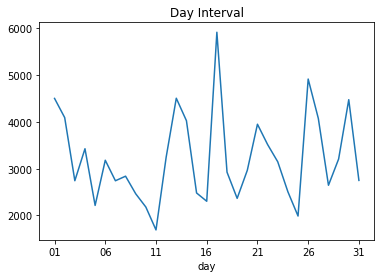

In [17]:
day_interval = interval_base[['item_id', 'day']]
day_interval = interval_base.groupby('day').size()
day_interval.plot()
plt.title('Day Interval')
plt.show()

Month Interval

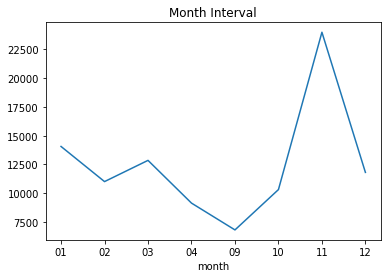

In [18]:
month_interval = interval_base[['item_id', 'month']].copy()
month_interval = interval_base.groupby('month').size()
month_interval.plot()
plt.title('Month Interval')
plt.show()

Year Interval

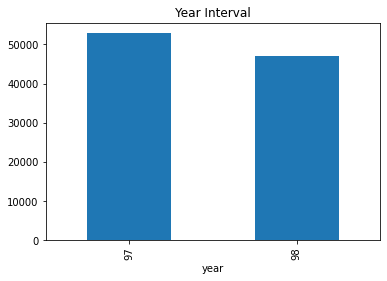

In [19]:
year_interval = interval_base[['item_id', 'year']].copy()
year_interval = interval_base.groupby('year').size()

year_interval.plot.bar()
plt.title('Year Interval')
plt.show()

User joined in the system

In [20]:
first_user_interaction = dataset_data[['users_id']]
first_user_interaction = pd.concat([first_user_interaction, day, month, year], axis=1)
new_users = first_user_interaction.drop_duplicates(subset=['users_id'], keep='first')

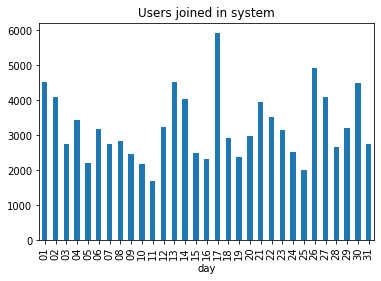

In [21]:
first_user_interaction = first_user_interaction.sort_values(by=['day'], ascending=1)
new_users = first_user_interaction.groupby('day').size()
new_users.plot.bar()
plt.title('Users joined in system')
plt.show()

Cumulative Users in system

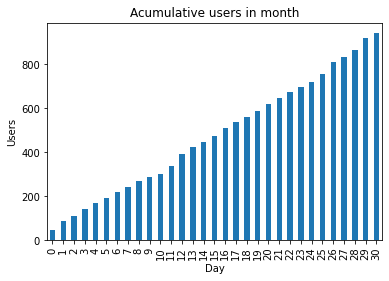

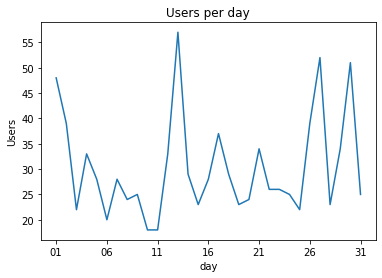

In [22]:
userMonthJoined = pd.concat([dataset_data[['users_id']], day], axis=1)
userMonthJoined = userMonthJoined.drop_duplicates(subset=['users_id'], keep='first').sort_values(by=['day'])
qtdUserJoinedPerDay = userMonthJoined.groupby(['day']).size()

acumulative = list()
acumulative_users = 0
for user_qtd in qtdUserJoinedPerDay:
    acumulative_users = acumulative_users + user_qtd
    acumulative.append(acumulative_users)

acumulative = pd.Series(acumulative)
plt.xlabel('Day'); plt.ylabel('Users')
plt.title('Acumulative users in month')
acumulative.plot.bar()
plt.show()

plt.xlabel('Day'); plt.ylabel('Users')
plt.title('Users per day')
qtdUserJoinedPerDay.plot.line()
plt.show()


In [23]:
dataTemp = dataset_data[['item_id', 'ratings']].sort_values(by=['item_id'])

# reset_index()
dataTemp = dataTemp.groupby(['item_id']).sum().reset_index()
dataTemp = pd.concat([dataset_items['movie_title'], dataTemp], axis=1)
mpi = dataTemp.sort_values(by='ratings', ascending=False)
mpi10 = dataTemp.sort_values(by='ratings', ascending=False).head(10)
mpi10.drop(columns=['item_id'], inplace=True)

mpi10

,movie_title,ratings
49,Star Wars (1977),2541
99,Fargo (1996),2111
180,Return of the Jedi (1983),2032
257,Contact (1997),1936
173,Raiders of the Lost Ark (1981),1786
126,"Godfather, The (1972)",1769
285,"English Patient, The (1996)",1759
0,Toy Story (1995),1753
97,"Silence of the Lambs, The (1991)",1673
287,Scream (1996),1645


<AxesSubplot:>

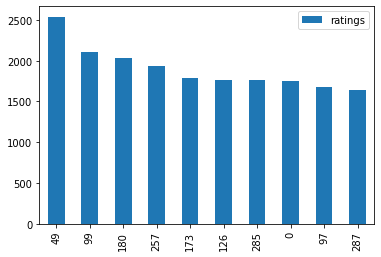

In [24]:
mpi10.plot.bar()

Most Popular Categories

In [86]:
def multiply_matrix(itemsCategories, itemsRatings, ascending):
    matrixItemCategories = itemsCategories.to_numpy()
    matrixItemRatings = itemsRatings.to_numpy()
    mpiCategories = matrixItemRatings * matrixItemCategories
    mpiCategories = pd.DataFrame(mpiCategories)
    mpiCategories.columns = data.dsCategorieColumns

    if ascending == 0:
        return mpiCategories.sum().sort_values(ascending=False)
    return mpiCategories.sum().sort_values(ascending=True)

By All the Items

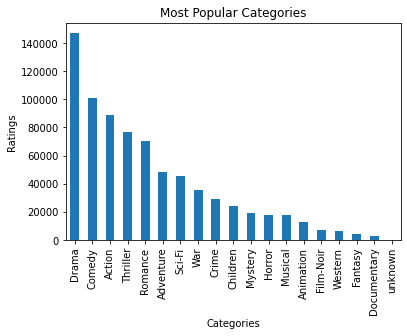

In [239]:
itemsCategories = dataset_items[['unknown','Action','Adventure','Animation','Children','Comedy','Crime',
                            'Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery',
                            'Romance','Sci-Fi','Thriller','War','Western']]

itemsRatings = mpi[['item_id', 'ratings']].reset_index().drop(['index'], axis=1).sort_values(by=['item_id'])
itemsRatings.drop(['item_id'], axis=1, inplace=True)

mpiCategories = multiply_matrix(itemsCategories, itemsRatings, 0)

mpiCategories.plot.bar()
plt.title("Most Popular Categories")
plt.xlabel('Categories'); plt.ylabel('Ratings')
plt.show()


Distribuitions by ages

Occupation of less 18 years

In [163]:
def occupationForYears(dataset, min, max):
    occupationsByAge = dataset.loc[(dataset['age'] > min) & (dataset['age'] <= max)]
    return occupationsByAge[['age', 'occupation']].groupby(by=['occupation']).sum().sort_values(by=['age'], ascending=False)

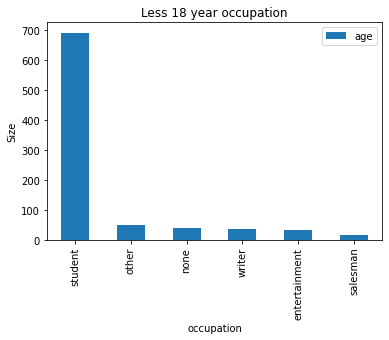

In [164]:
usersDataframe = data.users.copy()
occupation18Years = occupationForYears(usersDataframe, 0, 18)
occupation18Years.plot.bar()
plt.title('Less 18 year occupation')
plt.ylabel('Size')
plt.show()

Occupation between 18 to 40 years

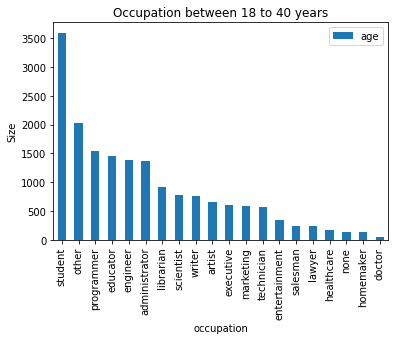

In [165]:
occupation18x40Years = occupationForYears(usersDataframe, 18, 40)
occupation18x40Years.plot.bar()
plt.title('Occupation between 18 to 40 years')
plt.ylabel('Size')
plt.show()

More than 40 years

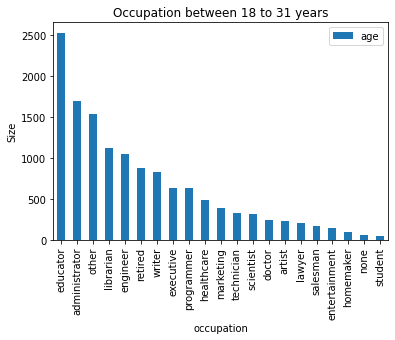

In [166]:
maxAge = max(usersDataframe['age'])
maxAge
occupationMore40Years = occupationForYears(usersDataframe, 40, maxAge)
occupationMore40Years.plot.bar()
plt.title('Occupation between 18 to 31 years')
plt.ylabel('Size')
plt.show()

Ratings by Occupation

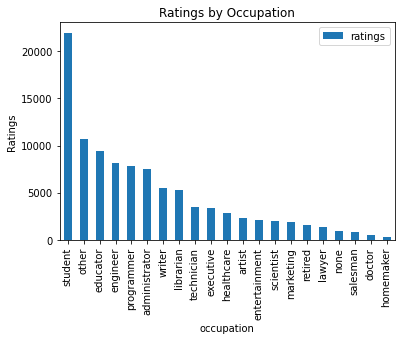

In [236]:
userRatings = dataset_data[['users_id', 'ratings']].copy().sort_values(by=['users_id'])
userRatings = userRatings.groupby(by=['users_id'])['ratings'].size().reset_index()
userRatings.drop(['users_id'], axis=1, inplace=True)
userInfo = dataset_users[['user_id', 'occupation']].copy()
userInfo.drop(['user_id'], axis=1, inplace=True)

ratingsByOccupation = pd.concat([userInfo, userRatings], axis=1)
ratingsByOccupation = ratingsByOccupation.groupby(by=['occupation']).sum()
ratingsByOccupation.sort_values(by=['ratings'], inplace=True, ascending=False)
ratingsByOccupation.plot.bar()
plt.title('Ratings by Occupation'); plt.ylabel('Ratings')
plt.show()

In [322]:
auxiliarColumnsItems = ['movie_id','unknown','Action','Adventure','Animation','Children','Comedy','Crime',
                            'Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery',
                            'Romance','Sci-Fi','Thriller','War','Western']

In [338]:
# Quais categorias os > 18 mais assistem?
usersLess18Y = data.users[['user_id', 'age']]
userLess18Y = usersLess18Y.loc[(usersDataframe['age'] <= 18)]
userLess18Y = userLess18Y.drop(['age'], axis=1)
userLess18Y = list(userLess18Y['user_id'])

itemUsersIds = data.data[['users_id', 'item_id']]
itemUsersIds = itemUsersIds.loc[(itemUsersIds['users_id'].isin(userLess18Y))].drop(['users_id'], axis=1)

itemUsersIds = itemUsersIds.groupby(by=['item_id']).size()

# itemUsersIdsMatrix = np.array()


# categoriesById = data.items[auxiliarColumnsItems]
# categoriesById = categoriesById